In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
sns.set_style('darkgrid')
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, log_loss
import numpy as np
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

In [163]:
df = pd.read_csv('./Dataset/BankChurners.csv')
df = df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])
print(df.shape)
df.head()

(10127, 21)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## Exploratory Data Analysis

In [164]:
df.value_counts('Attrition_Flag')

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
dtype: int64

In [165]:
df.dtypes.sort_values()

CLIENTNUM                     int64
Total_Trans_Ct                int64
Total_Trans_Amt               int64
Total_Revolving_Bal           int64
Contacts_Count_12_mon         int64
Months_Inactive_12_mon        int64
Months_on_book                int64
Total_Relationship_Count      int64
Dependent_count               int64
Customer_Age                  int64
Total_Ct_Chng_Q4_Q1         float64
Credit_Limit                float64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Avg_Utilization_Ratio       float64
Card_Category                object
Marital_Status               object
Education_Level              object
Gender                       object
Attrition_Flag               object
Income_Category              object
dtype: object

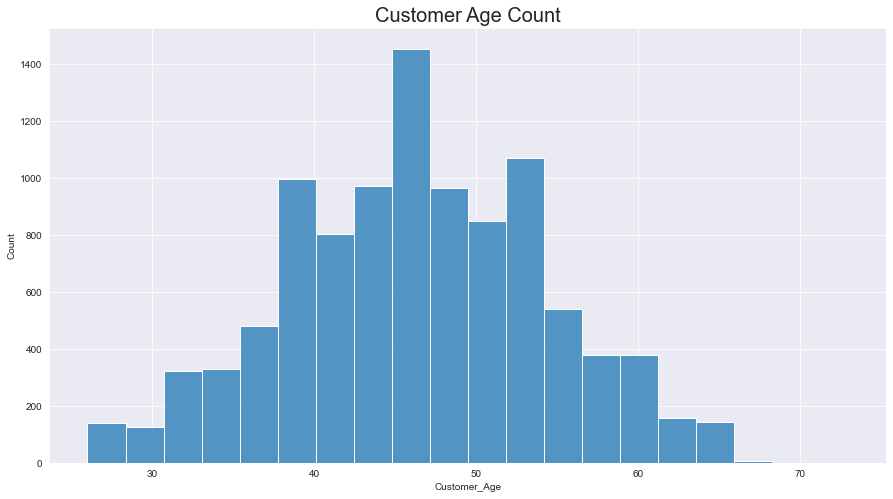

In [166]:
plt.figure(figsize=(15,8))
sns.histplot(x=df['Customer_Age'],bins=20, )
plt.title('Customer Age Count', fontsize = 20);

''

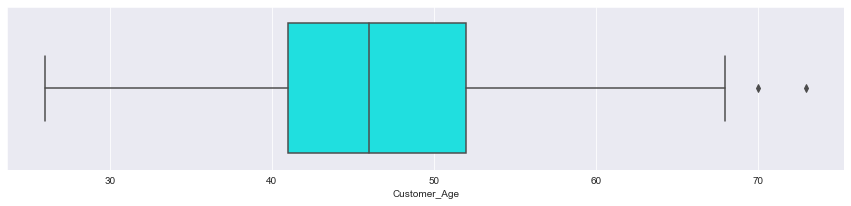

In [167]:
plt.figure(figsize=(15,3))
sns.boxplot(x='Customer_Age',data=df,meanline=True,color='cyan')
;

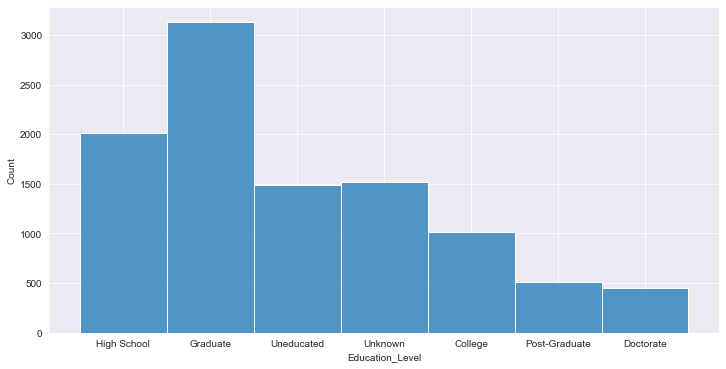

In [168]:
plt.figure(figsize=(12,6))
sns.histplot(x=df['Education_Level']);

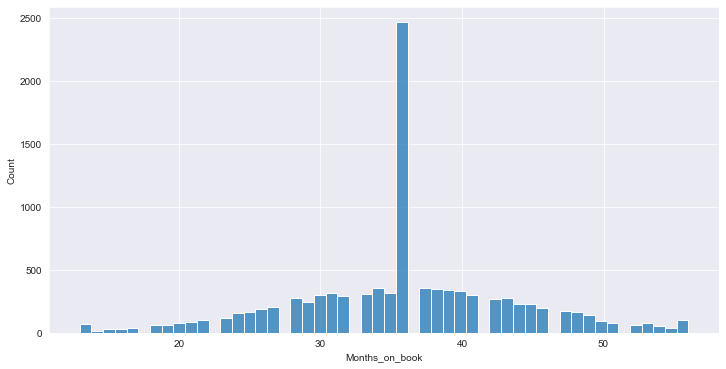

In [169]:
plt.figure(figsize=(12,6))
sns.histplot(x=df['Months_on_book']);

''

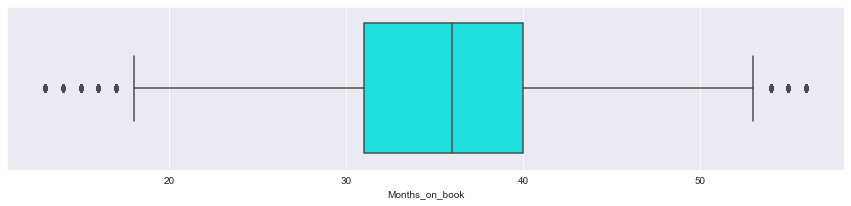

In [170]:
plt.figure(figsize=(15,3))
sns.boxplot(x='Months_on_book',data=df,meanline=True,color='cyan')
;

## Very interesting amount of customers with 36 months on book

In [171]:
ex.pie(df, names='Education_Level', title='Education Levels')

In [172]:
ex.pie(df, names='Income_Category', title='Income Category')

In [173]:
df = pd.get_dummies(df,drop_first=True)

In [174]:
df.corr()['Attrition_Flag_Existing Customer'].abs().sort_values(ascending=False)

Attrition_Flag_Existing Customer    1.000000
Total_Trans_Ct                      0.371403
Total_Ct_Chng_Q4_Q1                 0.290054
Total_Revolving_Bal                 0.263053
Contacts_Count_12_mon               0.204491
Avg_Utilization_Ratio               0.178410
Total_Trans_Amt                     0.168598
Months_Inactive_12_mon              0.152449
Total_Relationship_Count            0.150005
Total_Amt_Chng_Q4_Q1                0.131063
CLIENTNUM                           0.046430
Gender_M                            0.037272
Education_Level_Doctorate           0.029386
Income_Category_$60K - $80K         0.028221
Credit_Limit                        0.023873
Marital_Status_Married              0.023735
Income_Category_Less than $40K      0.022466
Marital_Status_Single               0.019037
Dependent_count                     0.018991
Customer_Age                        0.018203
Months_on_book                      0.013687
Education_Level_High School         0.011730
Income_Cat

In [175]:
X = df.drop(columns='Attrition_Flag_Existing Customer')
y = df['Attrition_Flag_Existing Customer']
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Attrition_Flag_Existing Customer   R-squared:                       0.378
Model:                                          OLS   Adj. R-squared:                  0.376
Method:                               Least Squares   F-statistic:                     191.7
Date:                              Mon, 14 Dec 2020   Prob (F-statistic):               0.00
Time:                                      15:00:06   Log-Likelihood:                -1820.1
No. Observations:                             10127   AIC:                             3706.
Df Residuals:                                 10094   BIC:                             3945.
Df Model:                                        32                                         
Covariance Type:                          nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.3814      0.069     -5.514      0.000      -0.517      -0.246
CLIENTNUM                       3.905e-10      8e-11      4.879      0.000    2.34e-10    5.47e-10
Customer_Age                       0.0007      0.001      1.238      0.216      -0.000       0.002
Dependent_count                   -0.0116      0.002     -5.102      0.000      -0.016      -0.007
Months_on_book                    -0.0003      0.001     -0.438      0.661      -0.001       0.001
Total_Relationship_Count           0.0426      0.002     21.349      0.000       0.039       0.047
Months_Inactive_12_mon            -0.0419      0.003    -14.588      0.000      -0.047      -0.036
Contacts_Count_12_mon             -0.0419      0.003    -15.759      0.000      -0.047      -0.037
Credit_Limit                    3.165e-05   1.68e-06     18.875      0.000    2.84e-05    3.49e-05
Total_Revolving_Bal             6.117e-05   3.49e-06     17.521      0.000    5.43e-05     6.8e-05
Avg_Open_To_Buy                -2.952e-05   1.85e-06    -15.933      0.000   -3.31e-05   -2.59e-05
Total_Amt_Chng_Q4_Q1               0.0536      0.014      3.726      0.000       0.025       0.082
Total_Trans_Amt                -3.614e-05   1.55e-06    -23.330      0.000   -3.92e-05   -3.31e-05
Total_Trans_Ct                     0.0101      0.000     46.493      0.000       0.010       0.011
Total_Ct_Chng_Q4_Q1                0.2926      0.013     21.962      0.000       0.266       0.319
Avg_Utilization_Ratio              0.0176      0.018      0.972      0.331      -0.018       0.053
Gender_M                           0.0813      0.011      7.541      0.000       0.060       0.102
Education_Level_Doctorate         -0.0320      0.016     -1.948      0.051      -0.064       0.000
Education_Level_Graduate           0.0005      0.011      0.049      0.961      -0.020       0.021
Education_Level_High School       -0.0012      0.011     -0.111      0.912      -0.023       0.021
Education_Level_Post-Graduate     -0.0276      0.016     -1.758      0.079      -0.058       0.003
Education_Level_Uneducated        -0.0046      0.012     -0.391      0.696      -0.028       0.019
Education_Level_Unknown           -0.0109      0.012     -0.921      0.357      -0.034       0.012
Marital_Status_Married             0.0447      0.011      3.889      0.000       0.022       0.067
Marital_Status_Single             -0.0060      0.012     -0.515      0.606      -0.029       0.017
Marital_Status_Unknown            -0.0046      0.015     -0.309      0.757      -0.034       0.025
Income_Category_$40K - $60K        0.0674      0.015      

In [176]:
results.pvalues.round(5).sort_values(ascending=False)

Education_Level_Graduate          0.96128
Education_Level_High School       0.91158
Marital_Status_Unknown            0.75719
Education_Level_Uneducated        0.69590
Months_on_book                    0.66107
Marital_Status_Single             0.60646
Education_Level_Unknown           0.35699
Avg_Utilization_Ratio             0.33126
Customer_Age                      0.21563
Income_Category_$80K - $120K      0.13123
Card_Category_Platinum            0.08790
Education_Level_Post-Graduate     0.07884
Education_Level_Doctorate         0.05142
Card_Category_Silver              0.02953
Card_Category_Gold                0.00150
Income_Category_$60K - $80K       0.00057
Income_Category_Unknown           0.00028
Total_Amt_Chng_Q4_Q1              0.00020
Marital_Status_Married            0.00010
Income_Category_Less than $40K    0.00007
Income_Category_$40K - $60K       0.00001
Contacts_Count_12_mon             0.00000
CLIENTNUM                         0.00000
Dependent_count                   

In [177]:
lowpval = list(results.pvalues.round(5).sort_values(ascending=False)[results.pvalues.round(5) < .05].index)

In [178]:
lowpval.remove('const')

In [179]:
# X = df[lowpval]
# y = df['Attrition_Flag_Existing Customer']
# X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)
# We don't want these train test values due to imbalanced classes

In [180]:
sm = SMOTE()
X,y = sm.fit_resample(X,y)
us = X.assign(Attrition_Flag_Existing_Customer = y)

In [181]:
us['Attrition_Flag_Existing_Customer'].value_counts()

1    8500
0    8500
Name: Attrition_Flag_Existing_Customer, dtype: int64

In [182]:
X_train, X_test, y_train, y_test = train_test_split(us[lowpval],us['Attrition_Flag_Existing_Customer'], random_state =42)

In [ ]:
# Simple Logistic Regression...just to see
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

## Modeling

In [183]:
pca = PCA(n_components =5)
pc = pca.fit_transform(us)
pca.explained_variance_ratio_

array([9.99999888e-01, 1.05007390e-07, 6.35816304e-09, 7.63838506e-10,
       1.26406674e-13])

In [184]:
cum_var = np.cumsum(pca.explained_variance_ratio_)
cum_var

array([0.99999989, 0.99999999, 1.        , 1.        , 1.        ])

In [185]:
us_pc = pd.concat([us,pd.DataFrame(pc,columns=['PC-{}'.format(i) for i in range(0,5)])],axis=1)

In [186]:
us_pc
# our new upsampled dataframe combined with our principle components

,const,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Attrition_Flag_Existing_Customer,PC-0,PC-1,PC-2,PC-3,PC-4
0,1.0,768805383,45,3,39,5,1,3,12691.000000,777,...,0,0,0,0,1,3.120213e+07,5874.750660,-2945.912878,-108.447171,2.252175
1,1.0,818770008,49,5,44,6,1,2,8256.000000,864,...,0,0,0,0,1,8.116675e+07,-1160.577624,-2306.553578,-53.312776,-9.546019
2,1.0,713982108,51,3,36,4,1,0,3418.000000,0,...,0,0,0,0,1,-2.362115e+07,-5849.215188,-1795.091977,-1081.772999,-22.854428
3,1.0,769911858,40,4,34,3,4,1,3313.000000,2517,...,0,0,0,0,1,3.230860e+07,-8612.970735,-2081.542497,1990.866898,-24.761458
4,1.0,709106358,40,3,21,5,1,0,4716.000000,0,...,0,0,0,0,1,-2.849690e+07,-4000.247169,-2972.808915,-1025.313017,-7.378756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,1.0,809576664,51,1,46,3,3,3,1810.044266,508,...,0,0,0,0,0,7.197341e+07,-9811.954716,-526.364245,-563.688659,-10.094038
16996,1.0,708732548,51,0,39,4,3,3,2936.530500,916,...,0,0,0,0,0,-2.887071e+07,-7105.087841,-1788.682954,44.278793,-1.473304
16997,1.0,708947037,47,2,37,3,2,2,1495.769548,893,...,0,0,0,0,0,-2.865622e+07,-9099.061841,-1133.125349,-13.434538,-7.758968
16998,1.0,710589086,26,0,13,1,2,3,6057.672150,109,...,0,0,0,0,0,-2.701417e+07,-2176.574802,-2511.191307,-914.391772,-13.216820


In [187]:
us_pc.columns

Index(['const', 'CLIENTNUM', 'Customer_Age', 'Dependent_count',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_M', 'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Income_Category_Unknown',
       'Card_Category_Gold', 'Card_Category_Platinum', 'Card_Category_Silver',
       'Attrition_Flag_Existing_Customer', 'PC-0', 'PC-1', 'PC-2', 'PC-3',
       'PC-4'],
   

In [188]:
features = us_pc.columns
n_comps = ['PC-4','PC-3','PC-2','PC-1','PC-0']
X = us_pc[n_comps]
y = us_pc['Attrition_Flag_Existing_Customer']

In [189]:
X_train,X_test,y_train,y_test =  train_test_split(X,y,random_state =123)

### RandomForest

In [194]:
pipe = Pipeline([
        ('ss',StandardScaler()),
        ('rf',RandomForestClassifier(random_state=50))
    ])
pipe_params = {
        'rf__n_estimators':[105],
        'rf__max_features':['auto'],
        'rf__max_depth':[15]
    }
gs = GridSearchCV(pipe,pipe_params,cv=5)
gs.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('rf',
                                        RandomForestClassifier(random_state=50))]),
             param_grid={'rf__max_depth': [15], 'rf__max_features': ['auto'],
                         'rf__n_estimators': [105]})

In [195]:
print(f'Test score is {gs.score(X_test,y_test)}')
print(f'Train score is {gs.score(X_train,y_train)}')
print(f'F1 score is {f1_score(y_test,gs.best_estimator_.predict(X_test))}')
print(f'Log loss is {log_loss(y_test,[i[1] for i in gs.predict_proba(X_test)])}')
print(f'Best params are {gs.best_params_}')

Test score is 0.9112941176470588
Train score is 0.9854117647058823
F1 score is 0.9091347312605447
Log loss is 0.2196444248040754
Best params are {'rf__max_depth': 15, 'rf__max_features': 'auto', 'rf__n_estimators': 105}


In [196]:
tn, fp, fn, tp = confusion_matrix(y_test, gs.predict(X_test)).ravel()
print(f'True Positive: {tp} False Positive: {fp}')
print(f'False Negative: {fn} True Negative: {tn}')

True Positive: 1886 False Positive: 131
False Negative: 246 True Negative: 1987


### Adaboost

In [200]:
pipe = Pipeline([
    ('ss',StandardScaler()),
    ('ada',AdaBoostClassifier(random_state=50))
])
pipe_params = {
    'ada__n_estimators':[65,70,80],
    'ada__learning_rate':[.9,.8,.7],
}
gs = GridSearchCV(pipe,pipe_params,cv=5)
gs.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('ada',
                                        AdaBoostClassifier(random_state=50))]),
             param_grid={'ada__learning_rate': [0.9, 0.8, 0.7],
                         'ada__n_estimators': [65, 70, 80]})

In [201]:
print(f'Test score is {gs.score(X_test,y_test)}')
print(f'Train score is {gs.score(X_train,y_train)}')
print(f'F1 score is {f1_score(y_test,gs.best_estimator_.predict(X_test))}')
print(f'Log loss is {log_loss(y_test,[i[1] for i in gs.predict_proba(X_test)])}')
print(f'Best params are {gs.best_params_}')

Test score is 0.8865882352941177
Train score is 0.879686274509804
F1 score is 0.8840230991337825
Log loss is 0.6549286154548836
Best params are {'ada__learning_rate': 0.8, 'ada__n_estimators': 80}


In [202]:
tn, fp, fn, tp = confusion_matrix(y_test, gs.predict(X_test)).ravel()
print(f'True Positive: {tp} False Positive: {fp}')
print(f'False Negative: {fn} True Negative: {tn}')

True Positive: 1837 False Positive: 187
False Negative: 295 True Negative: 1931
